In [10]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Chemins vers les fichiers TIFF des bandes Rouge (B3) et NIR (B4)
red_band_path = '../data/raw/landsat/LT05_L1TP_196047_19950627_20200912_02_T1/LT05_L1TP_196047_19950627_20200912_02_T1_B3.TIF'
nir_band_path = '../data/raw/landsat/LT05_L1TP_196047_19950627_20200912_02_T1/LT05_L1TP_196047_19950627_20200912_02_T1_B4.TIF'

In [5]:
# Charger les bandes avec rasterio
with rasterio.open(red_band_path) as red_src:
    red = red_src.read(1).astype('float64')

with rasterio.open(nir_band_path) as nir_src:
    nir = nir_src.read(1).astype('float64')

# Calcul du NDVI en évitant la division par zéro
ndvi = np.where((nir + red) == 0., 0, (nir - red) / (nir + red))

C:\Users\billo.bah\AppData\Local\Temp\ipykernel_25008\2974156172.py:9: RuntimeWarning: invalid value encountered in divide
  ndvi = np.where((nir + red) == 0., 0, (nir - red) / (nir + red))


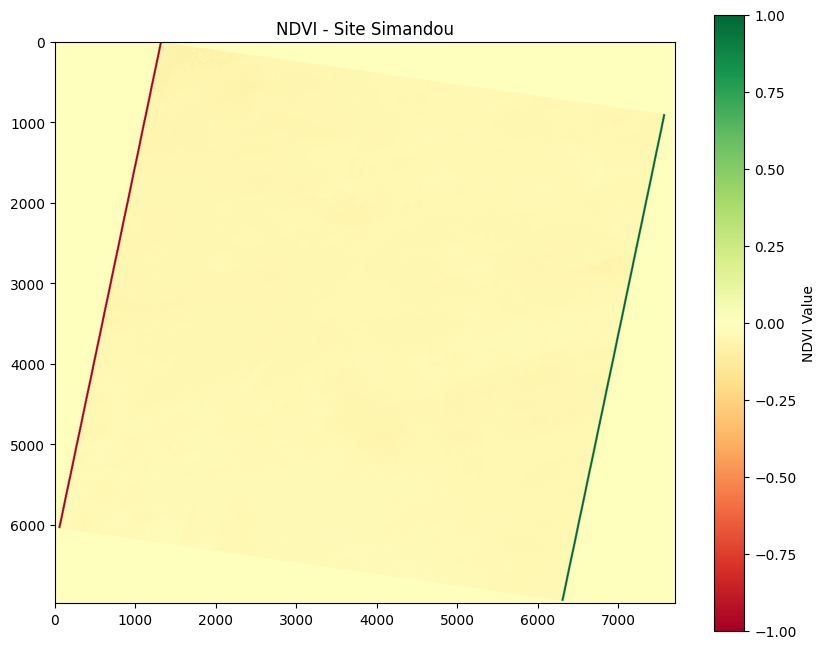

In [6]:
# Visualisation du NDVI
plt.figure(figsize=(10, 8))
plt.title('NDVI - Site Simandou')
plt.imshow(ndvi, cmap='RdYlGn')
plt.colorbar(label='NDVI Value')
plt.show()

In [12]:
# Créer le répertoire de sortie si nécessaire
output_dir = '../ndvi'
os.makedirs(output_dir, exist_ok=True)

# Sauvegarder le NDVI en GeoTIFF
output_path = os.path.join(output_dir, 'ndvi_simandou.tif')
with rasterio.open(
    output_path, 'w',
    driver='GTiff',
    height=ndvi.shape[0],
    width=ndvi.shape[1],
    count=1,
    dtype=ndvi.dtype,
    crs=red_src.crs,
    transform=red_src.transform
) as dst:
    dst.write(ndvi, 1)